# Proyecto analisis dataset con scrapy

## Nombre: Erick Mora

## Dataset:

#### El dataset escogido corresponde a datos sobre videojuegos rankeados por la comunidad. Los datos fueron extraidos de la página: www.imdb.com

#### Se incluyen únicamente juegos que tienen más de 1000 votos y tienen un rating desde 10 hasta 7
#### Los datos fueron extraidos de los siguientes enlaces:
#### https://www.imdb.com/search/title/?title_type=video_game&user_rating=7.0,10.0&num_votes=1000,1000000&sort=user_rating,desc&count=250
#### https://www.imdb.com/search/title/?title_type=video_game&user_rating=7.0,10.0&num_votes=1000,1000000&sort=user_rating,desc&count=250&start=251&ref_=adv_nxt

**Columnas:** 

* titulos
* genero1
* genero2
* genero3
* year
* votos
* rating
* director1
* director2


### Librerias:

In [27]:
import pandas as pd
import os
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import math
import numpy as np

### Dataset:

In [34]:
path_dataset = "./arania_proyecto/arania_proyecto/videojuegos.csv"
df_videojuegos =  pd.read_csv(path_dataset)
df_videojuegos


,titulos,genero1,genero2,genero3,year,votos,rating,director1,director2
0,The Witcher 3: Wild Hunt - Blood and Wine,Action,Adventure,Crime,2016,5586,9.8,Konrad Tomaszkiewicz,Michal Konarski
1,Red Dead Redemption II,Action,Adventure,Crime,2018,20216,9.7,Benjamin Byron Davis,Roger Clark
2,The Witcher 3: Wild Hunt,Action,Adventure,Drama,2015,18939,9.7,Konrad Tomaszkiewicz,Bruce Straley
3,The Last of Us,Action,Adventure,Drama,2013,48971,9.7,Neil Druckmann,Michal Konarski
4,God of War,Action,Adventure,Drama,2018,16059,9.6,Cory Barlog,Yoichi Yamada
...,...,...,...,...,...,...,...,...,...
224,Battlefield: Bad Company 2,Action,Adventure,Fantasy,2010,3649,8.2,Ed Boon,Jens Matthies
225,Left 4 Dead 2,Action,Adventure,Crime,2009,5573,8.2,Tore Blystad,Jamie Eden
226,Castlevania: Lords of Shadow,Action,Adventure,Horror,2010,1267,8.2,Frank O'Connor,Ramiro Bélanger
227,Grand Theft Auto IV: The Lost and Damned,Action,Horror,War,2009,3725,8.2,Patrick Bach,Neil Huxley


## Graficos

### 1) Videojuegos con el rating más alto

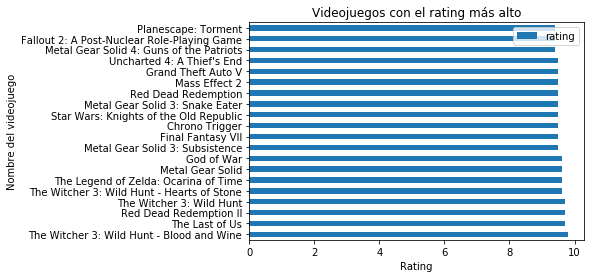

In [35]:
df_columnas = ['titulos', 'rating']
valores = df_videojuegos[df_columnas].sort_values(by='rating', ascending = False).head(20)
valores.index = valores['titulos']
valores.plot( kind='barh')
plt.ylabel('Nombre del videojuego')
plt.xlabel('Rating')
plt.title('Videojuegos con el rating más alto')
plt.show()

### 2) Videojuegos con mayor numero de votos

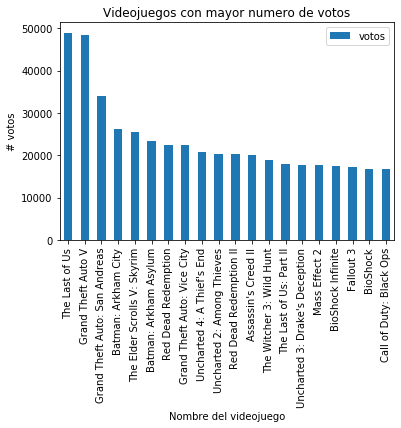

In [39]:
df_columnas = ['titulos', 'votos']
valores = df_videojuegos[df_columnas].sort_values(by='votos', ascending = False).head(20)
valores.index = valores['titulos']
valores.plot( kind='bar')
plt.xlabel('Nombre del videojuego')
plt.ylabel('# votos')
plt.title('Videojuegos con mayor numero de votos')
plt.show()

### 3) Videojuegos clasificados por genero principal

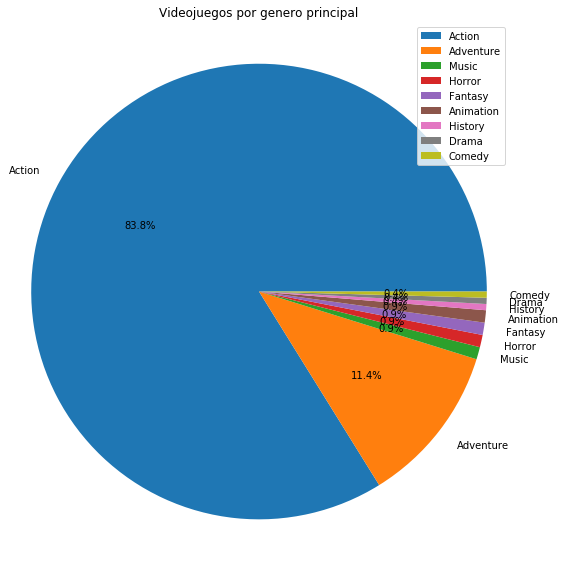

In [42]:
videojuegos = df_videojuegos.groupby("genero1")["titulos"].size().sort_values(ascending=False).head(10)

plt.figure(figsize = (8, 8)) 
plt.pie(videojuegos,labels=videojuegos.index,autopct='%1.1f%%')
plt.legend(patches,videojuegos.index,loc="best")
plt.axis("equal")
plt.title("Videojuegos por genero principal")
plt.tight_layout()
plt.show()

### 4) Videojuegos clasificados por genero secundario

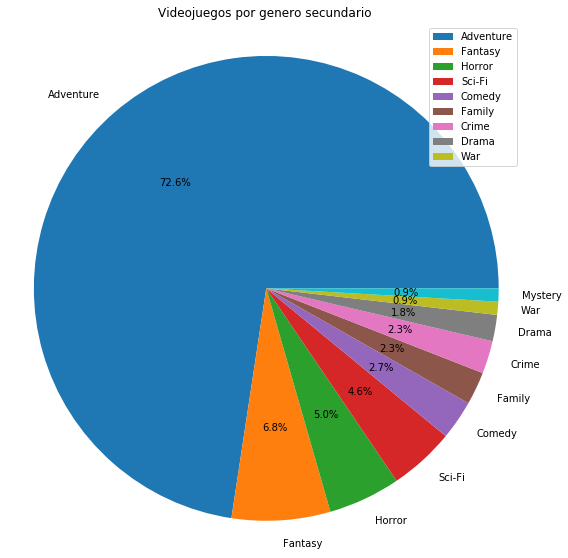

In [43]:
videojuegos = df_videojuegos.groupby("genero2")["titulos"].size().sort_values(ascending=False).head(10)

plt.figure(figsize = (8, 8)) 
plt.pie(videojuegos,labels=videojuegos.index,autopct='%1.1f%%')
plt.legend(patches,videojuegos.index,loc="best")
plt.axis("equal")
plt.title("Videojuegos por genero secundario")
plt.tight_layout()
plt.show()

### 5) Videojuegos clasificados por año

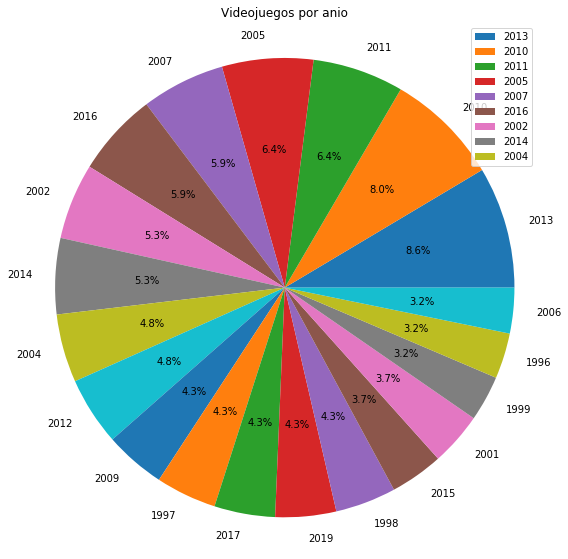

In [44]:
videojuegos = df_videojuegos.groupby("year")["titulos"].size().sort_values(ascending=False).head(20)

plt.figure(figsize = (8, 8)) 
plt.pie(videojuegos,labels=videojuegos.index,autopct='%1.1f%%')
plt.legend(patches,videojuegos.index,loc="best")
plt.axis("equal")
plt.title("Videojuegos por anio")
plt.tight_layout()
plt.show()

### 6) Videojuegos de genero aventura por año

year
2013    12
2011    11
2010    11
2005    11
2007     9
2002     9
2016     9
2014     9
2004     8
2019     8
Name: titulos, dtype: int64


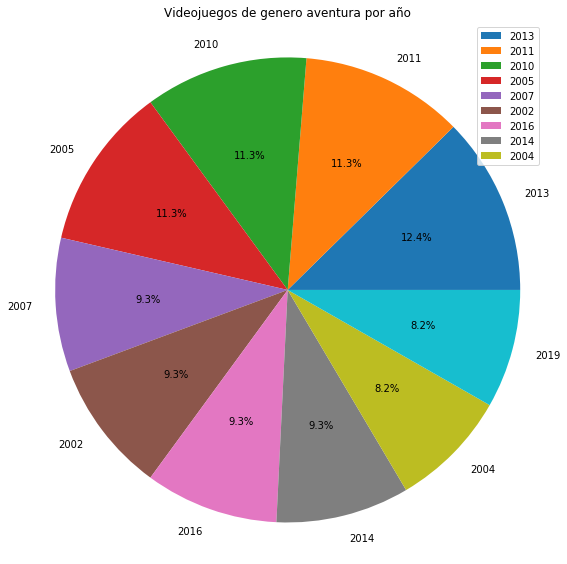

In [49]:
videojuegos = df_videojuegos[(df_videojuegos['genero1']=='Adventure') | (df_videojuegos['genero2']=='Adventure') | (df_videojuegos['genero3']=='Adventure')].groupby("year")["titulos"].size().sort_values(ascending=False).head(10)
print(videojuegos)
plt.figure(figsize = (8, 8)) 
plt.pie(videojuegos,labels=videojuegos.index,autopct='%1.1f%%')
plt.legend(patches,videojuegos.index,loc="best")
plt.axis("equal")
plt.title("Videojuegos de genero aventura por año")
plt.tight_layout()
plt.show()

### 7) Videojuegos de genero fantasia por año

year
2013    6
2011    6
2016    5
2014    5
2010    5
1997    5
2003    4
2015    4
2005    4
2009    3
Name: titulos, dtype: int64


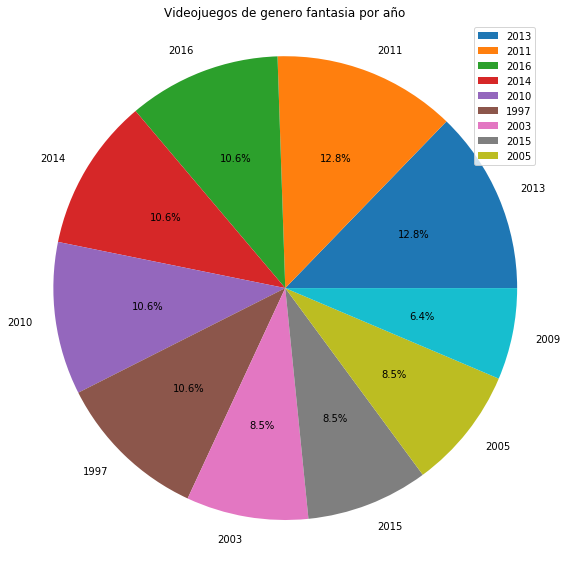

In [50]:
videojuegos = df_videojuegos[(df_videojuegos['genero1']=='Fantasy') | (df_videojuegos['genero2']=='Fantasy') | (df_videojuegos['genero3']=='Fantasy')].groupby("year")["titulos"].size().sort_values(ascending=False).head(10)
print(videojuegos)
plt.figure(figsize = (8, 8)) 
plt.pie(videojuegos,labels=videojuegos.index,autopct='%1.1f%%')
plt.legend(patches,videojuegos.index,loc="best")
plt.axis("equal")
plt.title("Videojuegos de genero fantasia por año")
plt.tight_layout()
plt.show()

### 8) Videojuegos con mayor numero de votos del año 2013

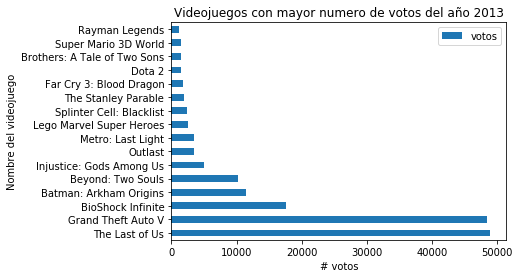

In [51]:
df_columnas = ['titulos', 'votos']
valores = df_videojuegos[df_columnas][df_videojuegos['year']==2013].sort_values(by='votos', ascending = False).head(20)
valores.index = valores['titulos']
valores.plot( kind='barh')
plt.ylabel('Nombre del videojuego')
plt.xlabel('# votos')
plt.title('Videojuegos con mayor numero de votos del año 2013')
plt.show()

### 9) Videojuegos con mayor rating del año 1996

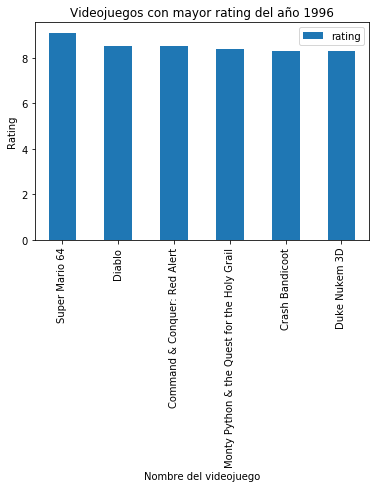

In [56]:
df_columnas = ['titulos', 'rating']
valores = df_videojuegos[df_columnas][df_videojuegos['year']==1996].sort_values(by='rating', ascending = False).head(20)
valores.index = valores['titulos']
valores.plot( kind='bar')
plt.ylabel('Rating')
plt.xlabel('Nombre del videojuego')
plt.title('Videojuegos con mayor rating del año 1996')
plt.show()

### 10) Videojuegos con menor numero de votos del año 2010

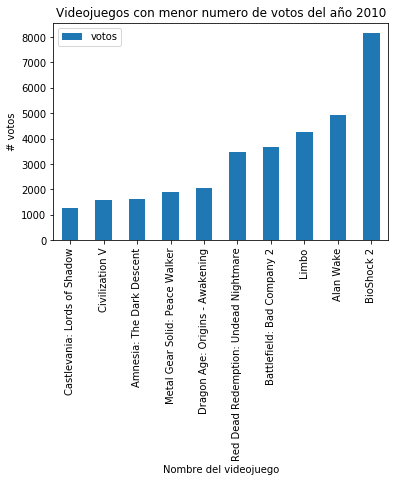

In [57]:
df_columnas = ['titulos', 'votos']
valores = df_videojuegos[df_columnas][df_videojuegos['year']==2010].sort_values(by='votos', ascending = True).head(10)
valores.index = valores['titulos']
valores.plot( kind='bar')
plt.xlabel('Nombre del videojuego')
plt.ylabel('# votos')
plt.title('Videojuegos con menor numero de votos del año 2010')
plt.show()

### 11) Videojuegos con menor rating del año 2016

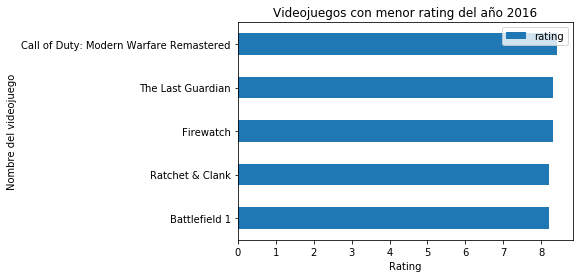

In [70]:
df_columnas = ['titulos', 'rating']
valores = df_videojuegos[df_columnas][df_videojuegos['year']==2016].sort_values(by='rating', ascending = True).head(5)
valores.index = valores['titulos']
valores.plot( kind='barh')
plt.xlabel('Rating')
plt.ylabel('Nombre del videojuego')
plt.title('Videojuegos con menor rating del año 2016')
plt.show()

### 12) Videojuegos por director

director1
Hideo Kojima            6
Tetsuya Nomura          5
Feargus Urquhart        4
Casey Hudson            4
Joseph D. Kucan         3
Hidetaka Miyazaki       3
David Cage              3
Masahiro Sakurai        3
Konrad Tomaszkiewicz    3
Amy Hennig              3
Name: titulos, dtype: int64


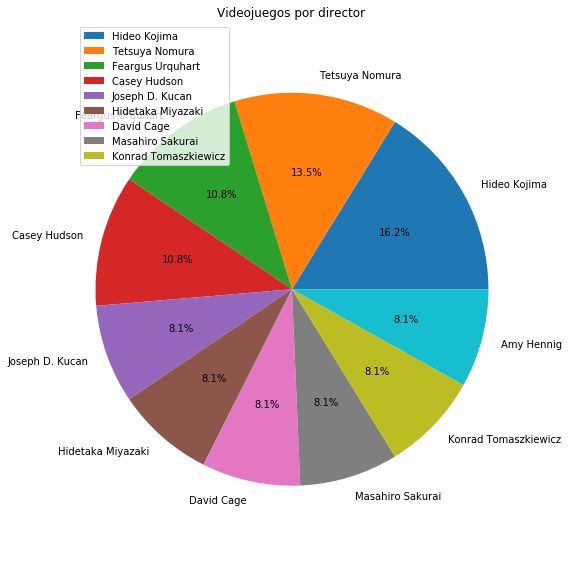

In [72]:
videojuegos = df_videojuegos.groupby("director1")["titulos"].size().sort_values(ascending=False).head(10)
print(videojuegos)
plt.figure(figsize = (8, 8)) 
plt.pie(videojuegos,labels=videojuegos.index,autopct='%1.1f%%')
plt.legend(patches,videojuegos.index,loc="best")
plt.axis("equal")
plt.title("Videojuegos por director")
plt.tight_layout()
plt.show()

### 13) Directores con más videojuegos dirigidos

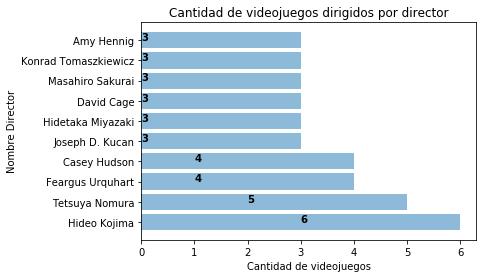

In [127]:
serie_videojuegos_director = df_videojuegos.groupby('director1').count()['titulos'].sort_values(ascending=False).head(10)
y_pos = np.arange(len(serie_videojuegos_director))
plt.barh(y_pos, serie_videojuegos_director.values, align='center', alpha=0.5)
plt.yticks(y_pos, serie_videojuegos_director.index)
for i, v in enumerate(serie_videojuegos_director.values):
    plt.text(v-3, i , str(v), color='black', fontweight='bold')
plt.xlabel('Cantidad de videojuegos')
plt.ylabel('Nombre Director')
plt.title('Cantidad de videojuegos dirigidos por director')
plt.show()

### 14) Videojuegos de genero accion del año 2000 ordenados por numero de votos

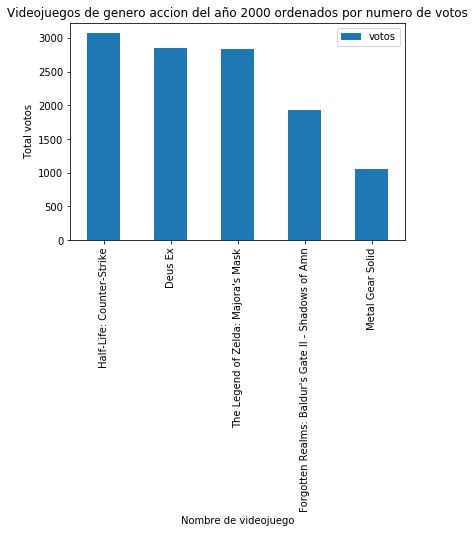

In [89]:
df_columnas = ['titulos','votos']
valores = df_videojuegos[df_columnas][(df_videojuegos['genero1']=='Action') & (df_videojuegos['year']==2000)].sort_values(by='votos', ascending = False).head(10)
valores.index = valores['titulos']
valores.plot( kind='bar')
plt.xlabel('Nombre de videojuego')
plt.ylabel('Total votos')
plt.title('Videojuegos de genero accion del año 2000 ordenados por numero de votos')
plt.show()

### 15) Videojuegos de genero aventura del año 2017 ordenados por rating

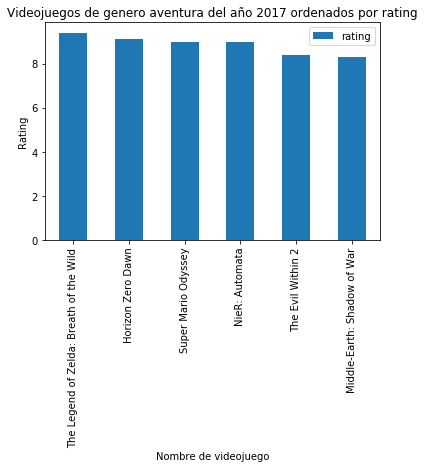

In [114]:
df_columnas = ['titulos','rating']
valores = df_videojuegos[df_columnas][((df_videojuegos['genero1']=='Adventure') | (df_videojuegos['genero2']=='Adventure') | (df_videojuegos['genero3']=='Adventure')) & (df_videojuegos['year']==2017)].sort_values(by='rating', ascending = False).head(10)
valores.index = valores['titulos']
valores.plot( kind='bar')
plt.xlabel('Nombre de videojuego')
plt.ylabel('Rating')
plt.title('Videojuegos de genero aventura del año 2017 ordenados por rating')
plt.show()

### 16) Videojuegos del director Tetsuya Nomura ordenados por rating

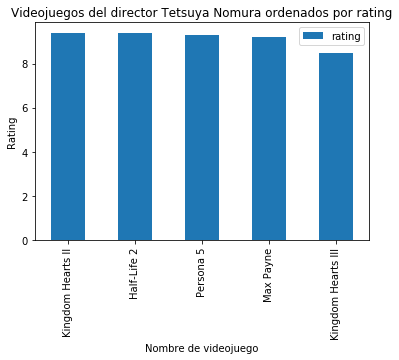

In [116]:
df_columnas = ['titulos','rating']
valores = df_videojuegos[df_columnas][(df_videojuegos['director1']=='Tetsuya Nomura') | (df_videojuegos['director2']=='Tetsuya Nomura')].sort_values(by='rating', ascending = False).head(10)
valores.index = valores['titulos']
valores.plot( kind='bar')
plt.xlabel('Nombre de videojuego')
plt.ylabel('Rating')
plt.title('Videojuegos del director Tetsuya Nomura ordenados por rating')
plt.show()

### 17) Videojuegos del director Casey Hudson ordenados por numero de votos

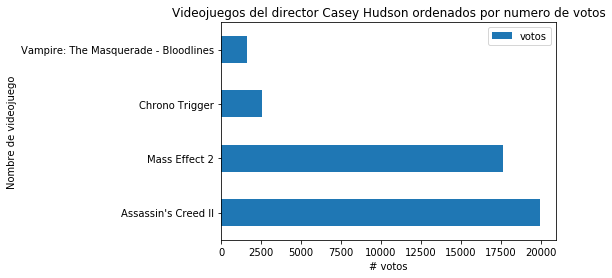

In [122]:
df_columnas = ['titulos','votos']
valores = df_videojuegos[df_columnas][(df_videojuegos['director1']=='Casey Hudson') | (df_videojuegos['director2']=='Casey Hudson')].sort_values(by='votos', ascending = False).head(10)
valores.index = valores['titulos']
valores.plot( kind='barh')
plt.xlabel('# votos')
plt.ylabel('Nombre de videojuego')
plt.title('Videojuegos del director Casey Hudson ordenados por numero de votos')
plt.show()

### 18) Años con mayor número de videojuegos lanzados

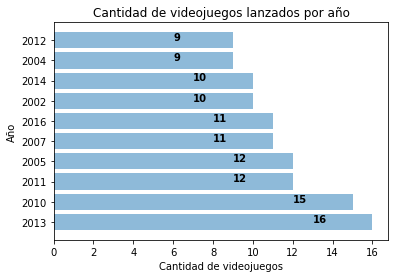

In [129]:
serie_videojuegos_anio = df_videojuegos.groupby('year').count()['titulos'].sort_values(ascending=False).head(10)
y_pos = np.arange(len(serie_videojuegos_anio))
plt.barh(y_pos, serie_videojuegos_anio.values, align='center', alpha=0.5)
plt.yticks(y_pos, serie_videojuegos_anio.index)
for i, v in enumerate(serie_videojuegos_anio.values):
    plt.text(v-3, i , str(v), color='black', fontweight='bold')
plt.xlabel('Cantidad de videojuegos')
plt.ylabel('Año')
plt.title('Cantidad de videojuegos lanzados por año')
plt.show()

### 19) Videojuegos por rating

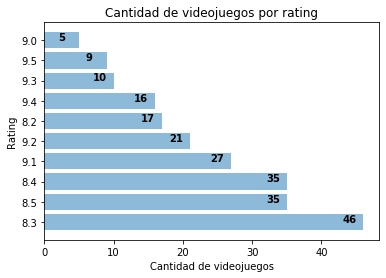

In [130]:
serie_videojuegos_anio = df_videojuegos.groupby('rating').count()['titulos'].sort_values(ascending=False).head(10)
y_pos = np.arange(len(serie_videojuegos_anio))
plt.barh(y_pos, serie_videojuegos_anio.values, align='center', alpha=0.5)
plt.yticks(y_pos, serie_videojuegos_anio.index)
for i, v in enumerate(serie_videojuegos_anio.values):
    plt.text(v-3, i , str(v), color='black', fontweight='bold')
plt.xlabel('Cantidad de videojuegos')
plt.ylabel('Rating')
plt.title('Cantidad de videojuegos por rating')
plt.show()

### 20) Videojuegos con rating de 9 ordenados por numero de votos

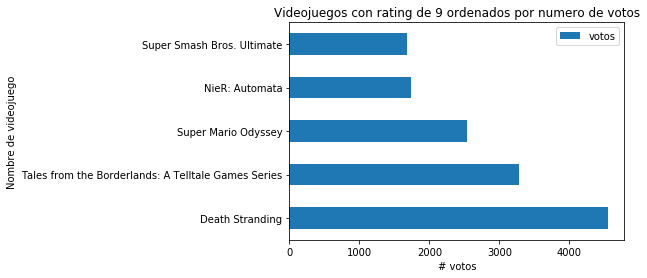

In [132]:
df_columnas = ['titulos','votos']
valores = df_videojuegos[df_columnas][(df_videojuegos['rating']==9.0)].sort_values(by='votos', ascending = False).head(10)
valores.index = valores['titulos']
valores.plot( kind='barh')
plt.xlabel('# votos')
plt.ylabel('Nombre de videojuego')
plt.title('Videojuegos con rating de 9 ordenados por numero de votos')
plt.show()